# 영문 분석 + 워드클라우드

In [1]:
!pip install matplotlib
!pip install wordCloud

     -------------------------------------- 152.1/152.1 kB 9.5 MB/s eta 0:00:00


In [5]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [3]:
all_files=glob.glob('영어단어분석/myCabinetExcelData*.xls')
all_files

['영어단어분석\\myCabinetExcelData (1).xls',
 '영어단어분석\\myCabinetExcelData (2).xls',
 '영어단어분석\\myCabinetExcelData (3).xls',
 '영어단어분석\\myCabinetExcelData (4).xls',
 '영어단어분석\\myCabinetExcelData (5).xls',
 '영어단어분석\\myCabinetExcelData (6).xls',
 '영어단어분석\\myCabinetExcelData (7).xls',
 '영어단어분석\\myCabinetExcelData (8).xls',
 '영어단어분석\\myCabinetExcelData (9).xls',
 '영어단어분석\\myCabinetExcelData.xls']

In [4]:
!pip install xlrd

In [5]:
all_files_data=[]
for file in all_files:
    data_frame=pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Does Medical School Training Relate to Practic...,unknown,Mary Ann Leibert,2015
1,NaN,2,Call for Special Issue Papers: Cloud Computing...,"Verdu, Elena; Nieto, Yuri Vanessa; Saleem, Nasir",Mary Ann Leibert,2022
2,NaN,3,Big data drives the development of Earth science,"Guo, Huadong",John Wiley & Sons Ltd,2017
3,NaN,4,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
4,NaN,5,Can Big Data Machines Analyze Stock Market Sen...,unknown,Mary Ann Leibert,2014
...,...,...,...,...,...,...
95,NaN,96,Perceptions of independent financial advisors ...,"Grishikashvili, Ketty; Bechter, Clemens",Inderscience,2019
96,NaN,97,Availability modelling and assurance for a big...,"Ke, Zuqiang; Park, Nohpill",Inderscience,2019
97,NaN,98,Classification and comparison of NoSQL big dat...,"Sharma, Sugam; Tim, Udoyara Sunday; Gadia, Sha...",Inderscience,2015
98,NaN,99,A platform for big data analytics on distribut...,"Aye, Kyar Nyo; Thein, Thandar",Inderscience,2015


In [6]:
all_files_data_concat=pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Does Medical School Training Relate to Practic...,unknown,Mary Ann Leibert,2015
1,NaN,2,Call for Special Issue Papers: Cloud Computing...,"Verdu, Elena; Nieto, Yuri Vanessa; Saleem, Nasir",Mary Ann Leibert,2022
2,NaN,3,Big data drives the development of Earth science,"Guo, Huadong",John Wiley & Sons Ltd,2017
3,NaN,4,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
4,NaN,5,Can Big Data Machines Analyze Stock Market Sen...,unknown,Mary Ann Leibert,2014
...,...,...,...,...,...,...
995,NaN,96,Artificial Bee Colony Reinforced Extended Kalm...,"Raghav, R. Srinivasa; Thirugnanasambandam, Kal...",Mary Ann Leibert,2022
996,NaN,97,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
997,NaN,98,Recent advance in earth observation big data f...,"Chen, Lajiao; Wang, Lizhe",John Wiley & Sons Ltd,2018
998,NaN,99,Call for Special Issue Papers: Big Data and th...,"Chang, Victor; Kacsuk, Péter; Wills, Gary; Beh...",Mary Ann Leibert,2022


In [7]:
all_files_data_concat.to_csv('영어단어분석/riss_bigdata.csv', encoding='utf-8', index=False)

In [8]:
all_title=all_files_data_concat['제목']
all_title

0      Does Medical School Training Relate to Practic...
1      Call for Special Issue Papers: Cloud Computing...
2       Big data drives the development of Earth science
3      An Ensemble-Based Scalable Approach for Intrus...
4      Can Big Data Machines Analyze Stock Market Sen...
                             ...                        
995    Artificial Bee Colony Reinforced Extended Kalm...
996     Big Data and Predictive Analytics in Health Care
997    Recent advance in earth observation big data f...
998    Call for Special Issue Papers: Big Data and th...
999    Agricultural Disaster Risk Management and Capa...
Name: 제목, Length: 1000, dtype: object

## 데이터 전처리
- 영어가 아닌 단어 제거
- 소문자로 정규화하여 단어 토큰화
- 불용어 제거 및 표제어 추출

In [9]:
stopWords=set(stopwords.words('english')) #영어 불용어 로드
lemma=WordNetLemmatizer() #표제어 추출 작업을 제공하는 객체

In [10]:
test_str='1ab alphabet 가test te11st'
result=re.sub(r"[^a-zA-Z]+", " ", str(test_str))
print(result)

 ab alphabet test te st


In [11]:
words=[]

for title in all_title:
    #알파벳이 아닌 문자를 공백으로 치환
    EnWords=re.sub(r"[^a-zA-Z]+", " ", str(title))
    
    #소문자로 정규화
    EnWordsToken=word_tokenize(EnWords.lower())
    
    #불용어 제거 및 표제어 추출
    EnWordsTokenStop=[w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma=[lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [12]:
#words

In [13]:
reduce(lambda x, y:x+y, [0, 1, 2, 3, 4])

10

In [14]:
reduce(lambda x, y:y+x, 'abcde')

'edcba'

In [15]:
#words가 2차원 리스트이기 때문에 reduce() 함수를 이용하여 1차원 리스트로 변환함
words2=list(reduce(lambda x, y:x+y, words))
print(words2)

['medical', 'school', 'training', 'relate', 'practice', 'evidence', 'big', 'data', 'call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot', 'big', 'data', 'drive', 'development', 'earth', 'science', 'ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'big', 'data', 'machine', 'analyze', 'stock', 'market', 'sentiment', 'efficient', 'ensemble', 'based', 'classification', 'framework', 'big', 'medical', 'data', 'call', 'paper', 'special', 'issue', 'big', 'data', 'robotics', 'big', 'data', 'healthcare', 'opportunity', 'challenge', 'new', 'big', 'data', 'approach', 'based', 'geoecological', 'information', 'modeling', 'system', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'big', 'data', 'lost', 'cloud', 'new', 'discrimination', 'diagram', 'basalt', 'based', 'big', 'data', 'research', 'big', 'data', 'lost', 'cloud', 'remotely', 'sensed', 'big', 'data', 'ocean', 'polar', 'region', 'bi

## 데이터 탐색 및 분석 모델 구축

In [17]:
count=Counter(words2)
count

Counter({'medical': 15,
         'school': 4,
         'training': 3,
         'relate': 1,
         'practice': 11,
         'evidence': 10,
         'big': 1116,
         'data': 1237,
         'call': 33,
         'special': 37,
         'issue': 48,
         'paper': 32,
         'cloud': 30,
         'computing': 25,
         'cognitive': 4,
         'iot': 10,
         'drive': 2,
         'development': 20,
         'earth': 25,
         'science': 35,
         'ensemble': 4,
         'based': 100,
         'scalable': 14,
         'approach': 57,
         'intrusion': 1,
         'detection': 12,
         'using': 56,
         'framework': 35,
         'machine': 26,
         'analyze': 2,
         'stock': 4,
         'market': 9,
         'sentiment': 5,
         'efficient': 20,
         'classification': 10,
         'robotics': 3,
         'healthcare': 16,
         'opportunity': 28,
         'challenge': 43,
         'new': 39,
         'geoecological': 1,
         'info

In [18]:
word_count=dict()
word_count
for tag, counts in count.most_common(50):
    if len(str(tag))>1:
        word_count[tag]=counts
        print("%s : %d" %(tag, counts))

#의미없는 단어도 있어서 길이가 1보다 큰 단어를 선별함

data : 1237
big : 1116
analytics : 110
based : 100
analysis : 94
driven : 67
system : 61
approach : 57
using : 56
learning : 49
model : 49
issue : 48
challenge : 43
application : 41
new : 39
special : 37
science : 35
framework : 35
algorithm : 35
platform : 34
management : 34
call : 33
research : 33
paper : 32
health : 31
cloud : 30
era : 30
opportunity : 28
technology : 27
machine : 26
processing : 26
mining : 26
computing : 25
earth : 25
smart : 25
network : 25
performance : 25
optimization : 24
perspective : 24
information : 23
business : 23
distributed : 23
method : 23
intelligence : 22
process : 22
service : 21
review : 21
use : 21
development : 20
efficient : 20


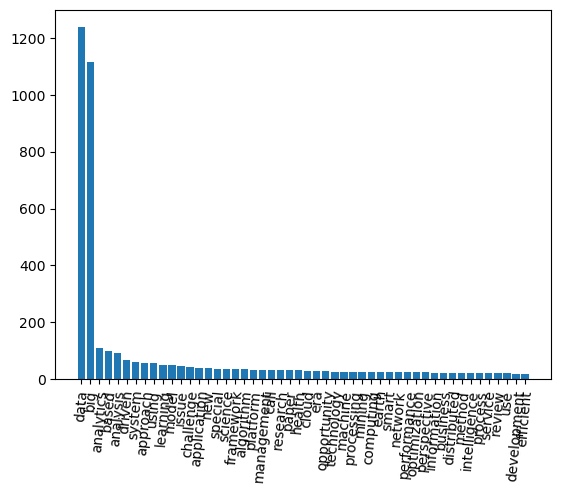

In [19]:
sorted_Keys=sorted(word_count, key=word_count.get, reverse=True)
sorted_Values=sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

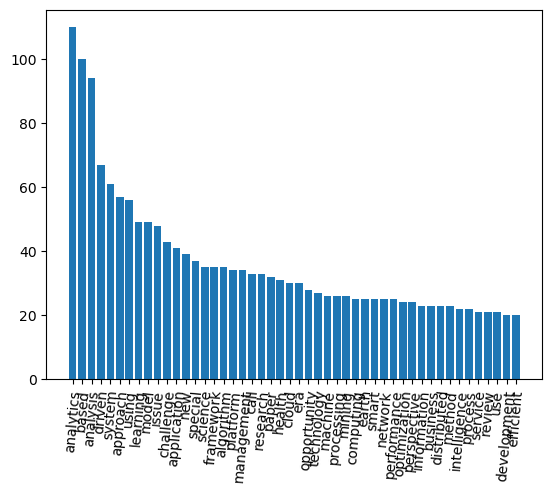

In [20]:
del word_count['big']
del word_count['data']

sorted_Keys=sorted(word_count, key=word_count.get, reverse=True)
sorted_Values=sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

In [21]:
all_files_data_concat['doc_count']=0
summary_year=all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()

summary_year

,출판일,doc_count
0,2003,1
1,2004,1
2,2009,1
3,2011,5
4,2012,19
5,2013,49
6,2014,127
7,2015,95
8,2016,114
9,2017,130


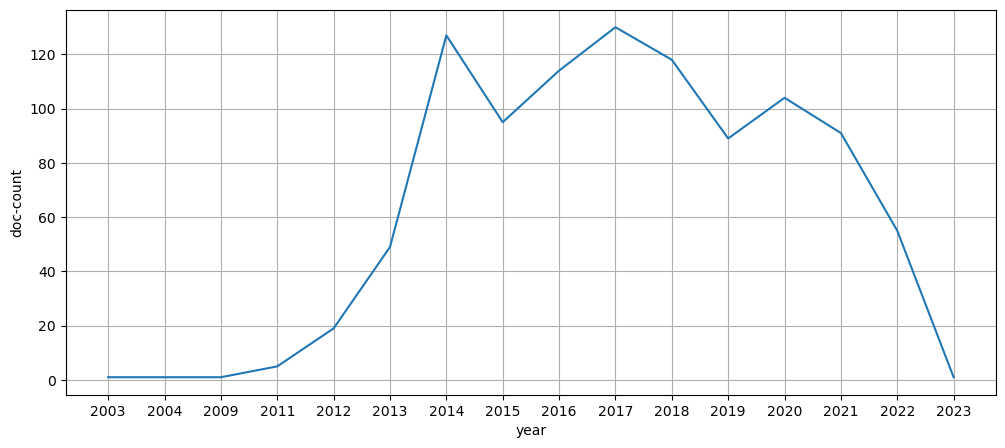

In [22]:
plt.figure(figsize=(12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

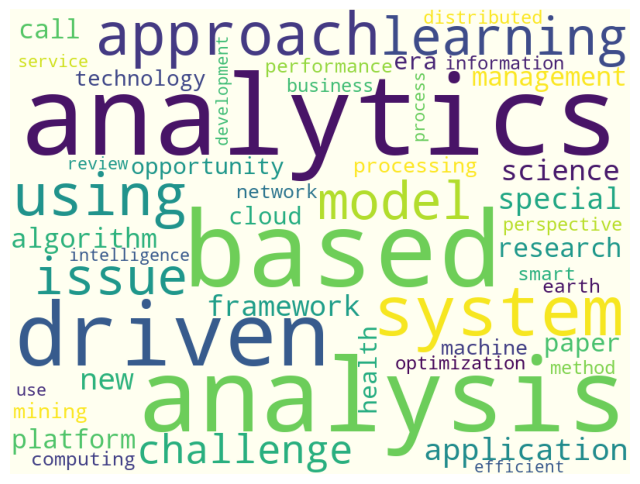

In [23]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords,
            width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [24]:
cloud.to_file('영어단어분석/riss_bigdatawordCloud.jpg')